# ICP 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## example data 2D gate & tag points

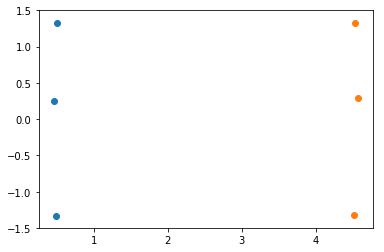

In [2]:
gate_poses = np.array([[0.501, 1.326],      # tag 4
                        [0.4675, 0.2515],    # tag 5
                        [0.4835, -1.34]])    # tag 6

tag_poses = np.array([[ 4.53256715,  1.32114674],
                         [ 4.57090491,  0.29619518],
                         [ 4.5174239,  -1.32085923]])

plt.scatter(gate_poses[:,0],gate_poses[:,1])
plt.scatter(tag_poses[:,0],tag_poses[:,1])
plt.show()

## steps to find best transform

    - find point pairs  ------>  already paired
    - compute centroids
    - build the correlation matrix H
    - estimate rotation matrix R using SVD
    - estimate the translation vector t
    - build the final transformation matrix T
    - transform dataset m using the transform T

In [20]:
target = tag_poses
model = gate_poses

### compute centroids
    c = (p1+p2+...+pn) / n

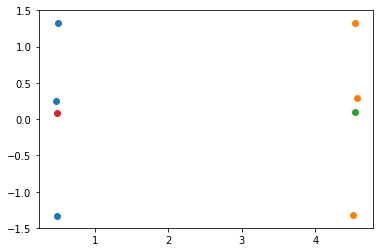

In [21]:
c_target = np.sum(target,axis=0)/3
c_model = np.sum(model,axis=0)/3

plt.scatter(model[:,0],model[:,1])
plt.scatter(target[:,0],target[:,1]) 
plt.scatter(c_target[0],c_target[1])
plt.scatter(c_model[0],c_model[1])
plt.show()

### build the correlation matrix H 
    For H we first have to center/de-mean (move to the origin of the coordinate system) both datasets.
    That is subtract the respective centroid from every point in the dataset:

    P1d = P1 – Pc = [x1,y1]
    P2d = P2 – Pc = [x2,y2]
    P3d = P3 – Pc = [x3,y3]
    
    M = [[x1,x2,x3],
         [y1,y2,y3]]
    
    H = M_model * M_target_transpose

In [50]:
t_P1d = target[0] - np.sum(target,axis=0)/3
t_P2d = target[1] - np.sum(target,axis=0)/3
t_P3d = target[2] - np.sum(target,axis=0)/3
m_target = [[t_P1d[0] , t_P2d[0], t_P3d[0]], [t_P1d[1], t_P2d[1], t_P3d[1]]]

m_P1d = model[0] - np.sum(model,axis=0)/3
m_P2d = model[1] - np.sum(model,axis=0)/3
m_P3d = model[2] - np.sum(model,axis=0)/3
m_model = [[m_P1d[0] , m_P2d[0], m_P3d[0]], [m_P1d[1], m_P2d[1], m_P3d[1]]]

In [52]:
# calculate correlation matrix
H =  np.dot(m_model, np.transpose(m_target))

print H

[[ -6.25001415e-04   1.82327037e-02]
 [  2.80976696e-02   3.57281349e+00]]


### estimate rotation matrix R using SVD
    [U, D, V] = SVD(H)
    Finally R can be computed as following:
    R = U * V
    
    - numpy SVD: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html
    

In [61]:
U, D, V = np.linalg.svd(H)

rotation = np.dot(U, V)

print rotation

[[-0.99991596  0.01296412]
 [ 0.01296412  0.99991596]]


### estimate the translation vector t
    P_model_centroid = rotation * P_target_centroid + translation
   
    translation = P_model_centroid - rotation * P_target_centroid
    

In [57]:
translation = c_model - np.dot(rotation, c_target)
print translation

[ 5.02263588 -0.07851356]


### build the final transformation matrix T
    T = [R t'
         0 1]
    
    T = [[ R11 R12 T1 ]
         [ R21 R22 T2 ]
         [ 0   0   1  ]]

In [70]:

transform = [rotation[0][0],rotation[0][1],translation[0]],[rotation[1][0],rotation[1][1],translation[1]],[0, 0, 1]
transform = np.array(transform)
print transform

[[-0.99991596  0.01296412  5.02263588]
 [ 0.01296412  0.99991596 -0.07851356]
 [ 0.          0.          1.        ]]


### transform dataset m using the transform T
    new_target_P[i] = translation + roataion*target_P[i]
    

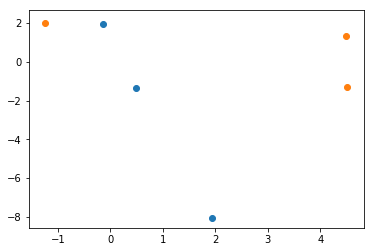

In [101]:
# transform every target point using translation and rotation to fit model

target = np.dot(transform,target)
model = np.dot(transform,model)

plt.scatter(model[:,0],model[:,1])
plt.scatter(target[:,0],target[:,1])
plt.show()

### combine best fit transform

In [106]:
def best_fit_transform( model, target):
        ################## student implement ##################

        # calculate centroid
        c_target = np.sum(target,axis=0)/3
        c_model = np.sum(model,axis=0)/3 

        # de mean
        t_P1d = target[0] - np.sum(target,axis=0)/3
        t_P2d = target[1] - np.sum(target,axis=0)/3
        t_P3d = target[2] - np.sum(target,axis=0)/3
        m_target = [[t_P1d[0] , t_P2d[0], t_P3d[0]], [t_P1d[1], t_P2d[1], t_P3d[1]]]

        m_P1d = model[0] - np.sum(model,axis=0)/3
        m_P2d = model[1] - np.sum(model,axis=0)/3
        m_P3d = model[2] - np.sum(model,axis=0)/3
        m_model = [[m_P1d[0] , m_P2d[0], m_P3d[0]], [m_P1d[1], m_P2d[1], m_P3d[1]]]  

        # calculate correlation matrix
        H = np.dot(m_model, np.transpose(m_target))


        # SVD decompose
        U, D, V = np.linalg.svd(H)

        # get Rotation & Translation
        rotation = np.dot(U, V)
        translation = c_model - np.dot(rotation, c_target)

        # combine matrix
        transform = [rotation[0][0],rotation[0][1],translation[0]],[rotation[1][0],rotation[1][1],translation[1]],[0, 0, 1]
        transform = np.array(transform)
        ################## student implement ##################

        return transform

### ICP

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


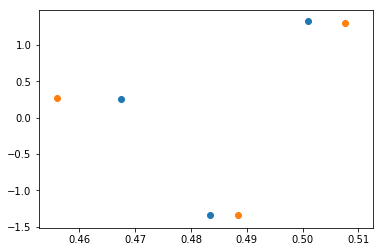

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


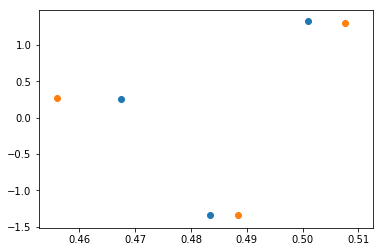

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


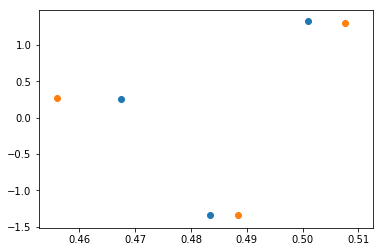

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


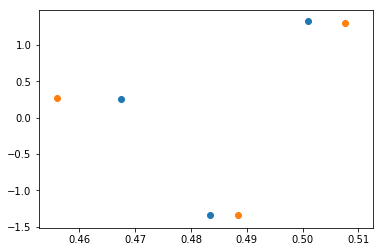

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


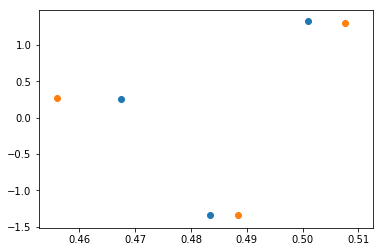

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


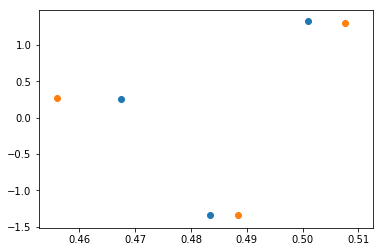

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


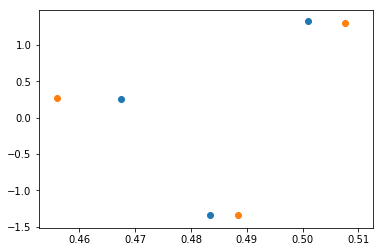

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


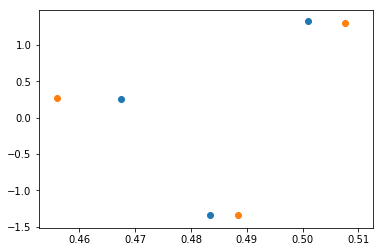

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


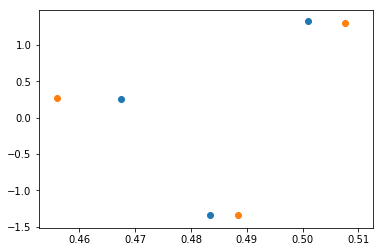

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


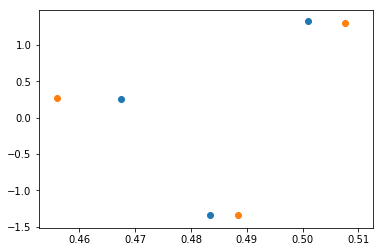

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


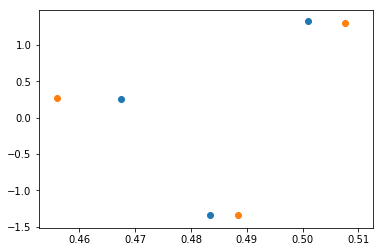

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


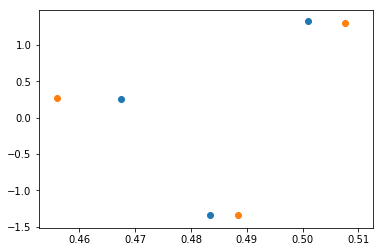

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


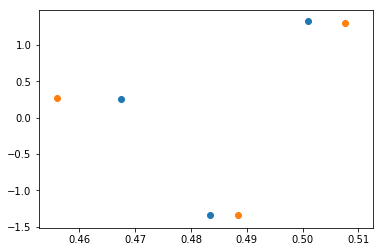

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


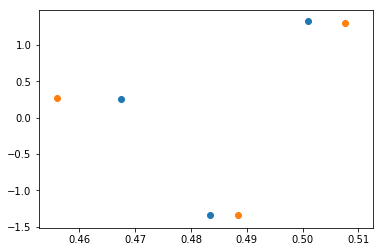

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


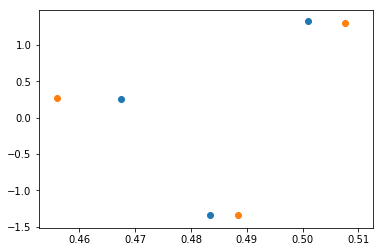

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


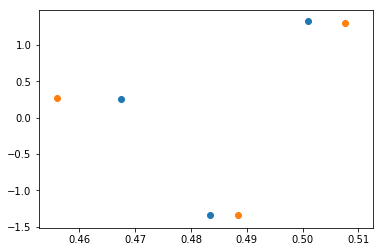

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


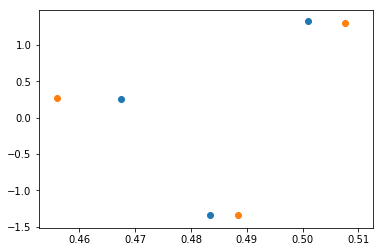

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


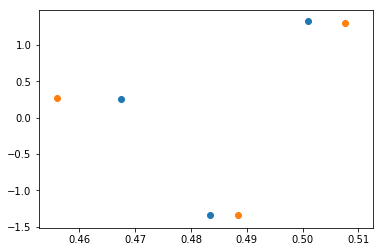

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


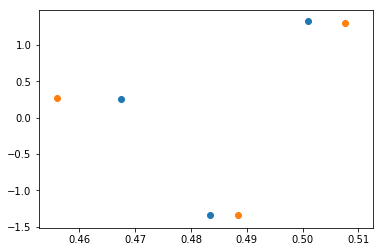

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


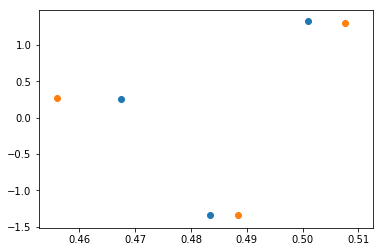

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


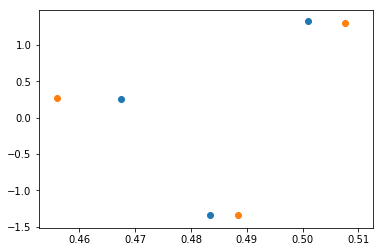

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


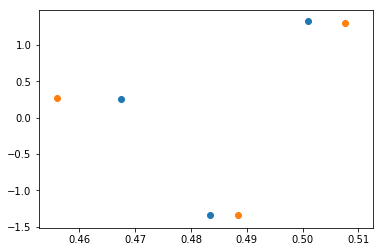

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


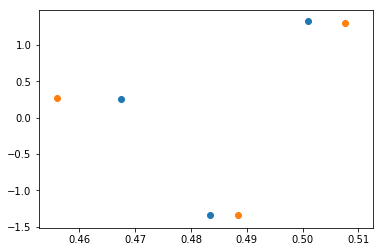

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


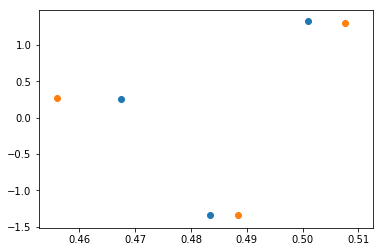

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


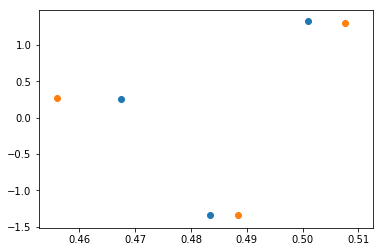

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


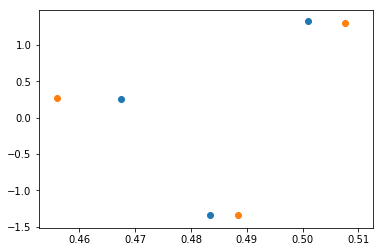

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


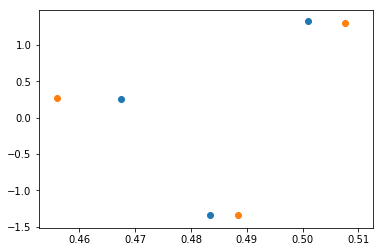

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


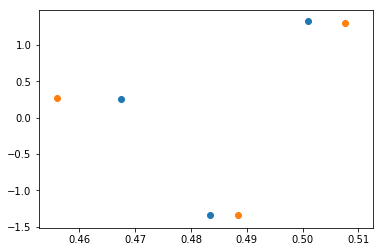

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


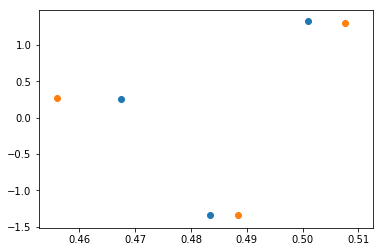

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


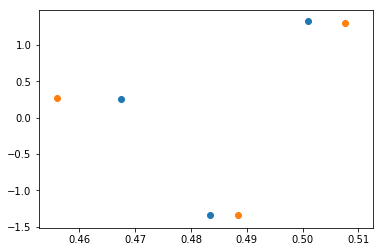

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


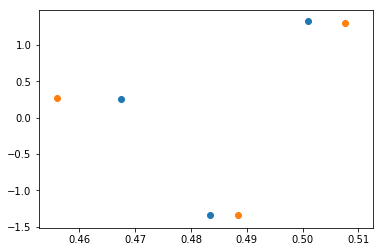

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


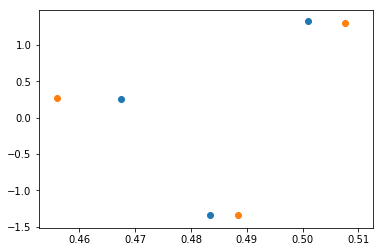

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


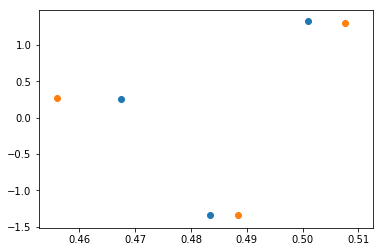

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


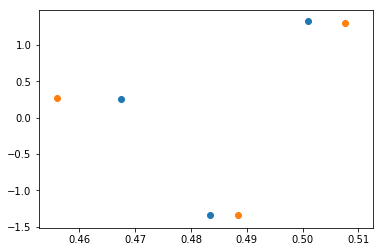

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


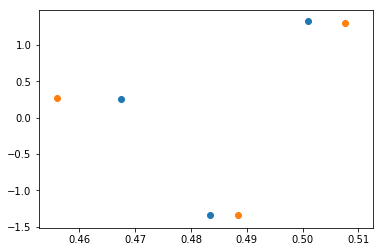

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


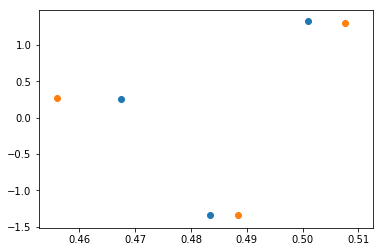

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


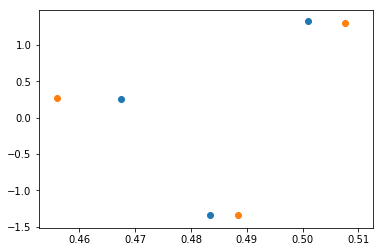

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


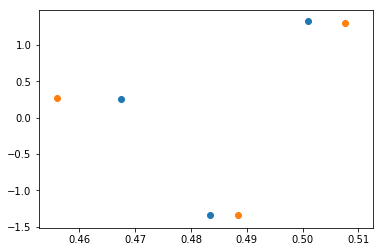

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


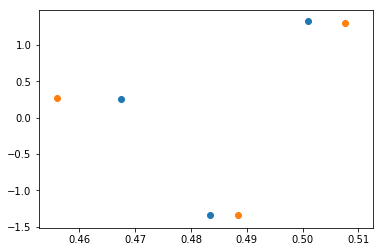

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


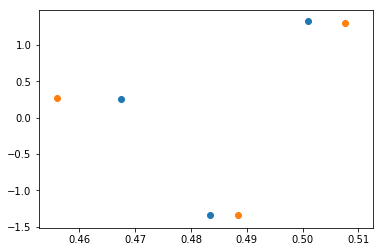

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


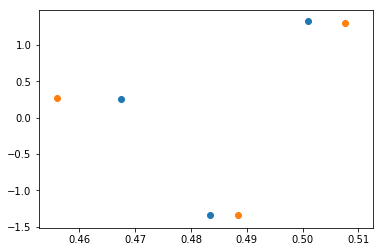

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


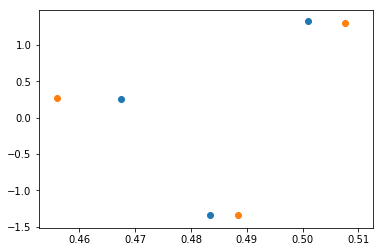

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


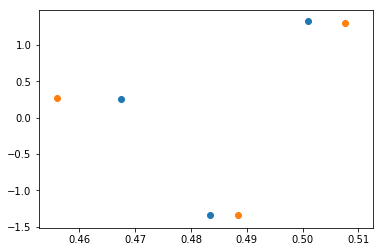

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


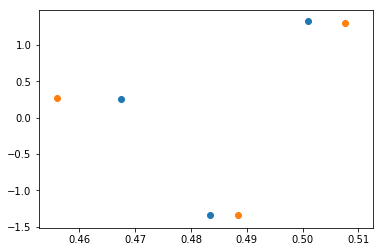

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


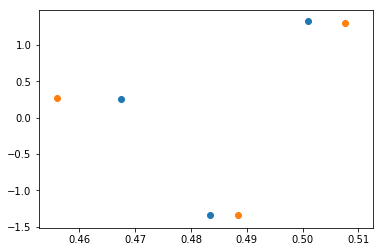

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


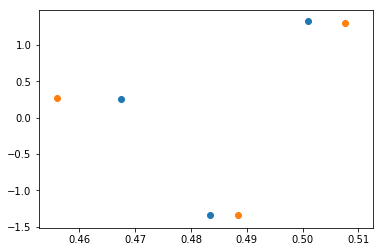

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


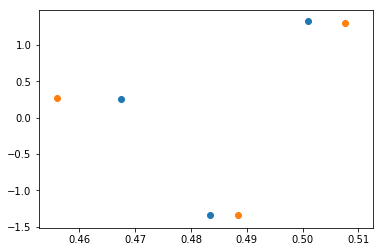

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


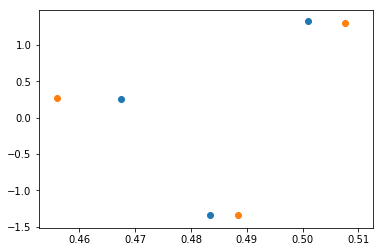

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


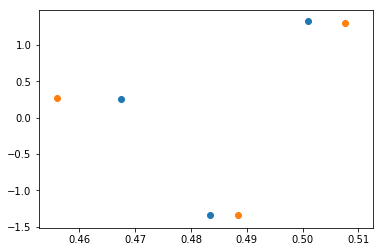

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


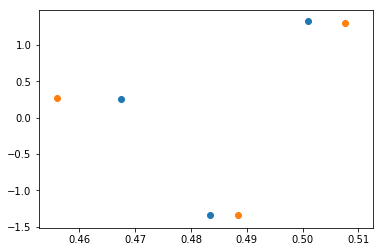

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


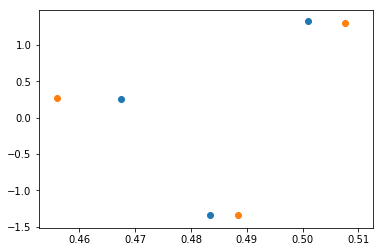

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


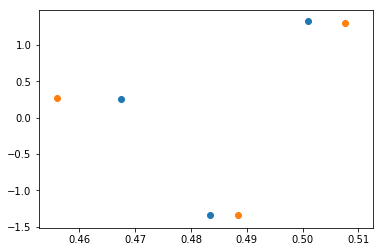

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


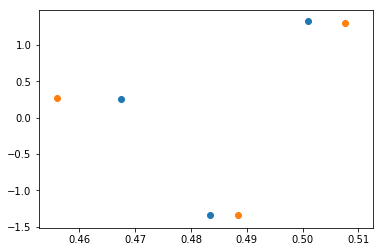

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


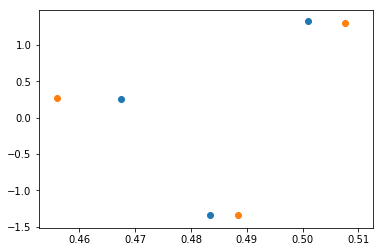

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


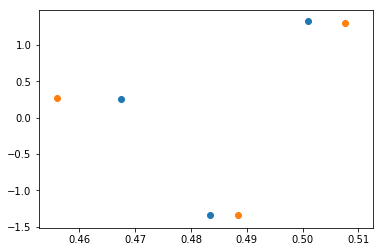

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


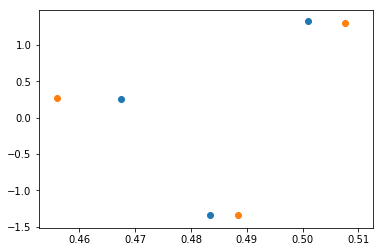

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


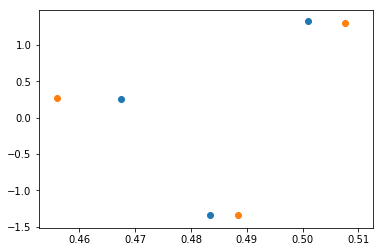

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


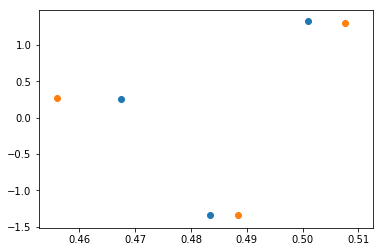

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


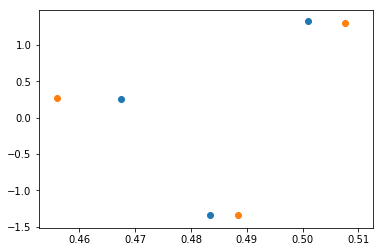

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


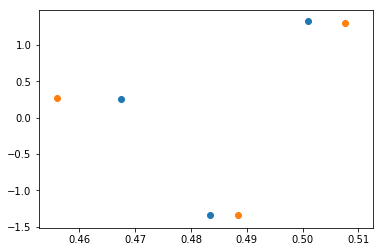

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


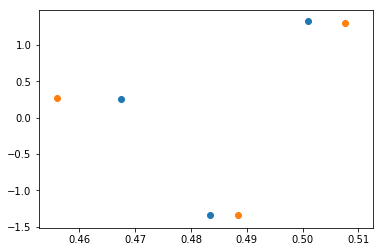

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


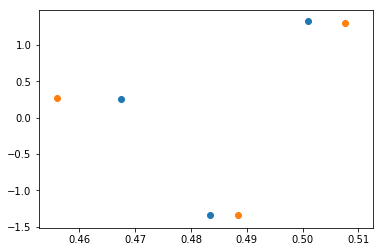

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


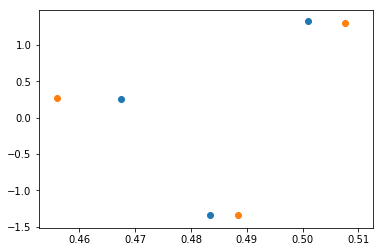

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


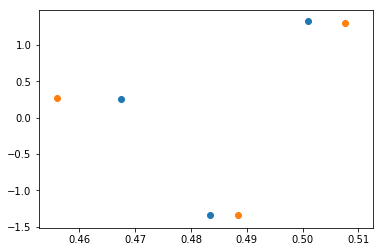

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


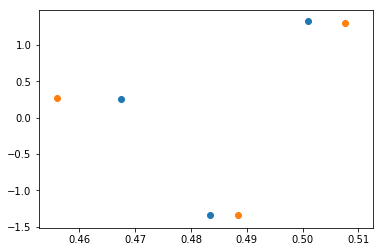

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


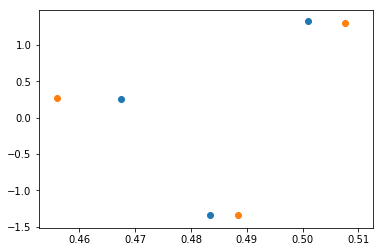

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


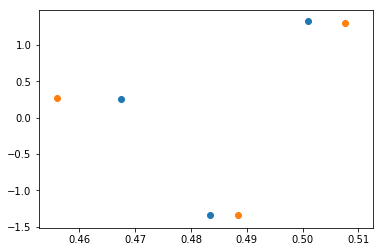

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


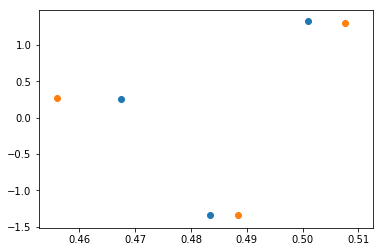

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


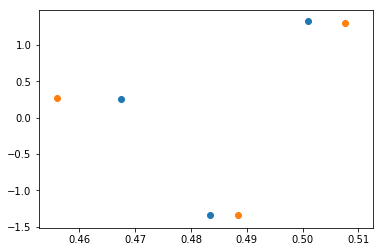

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


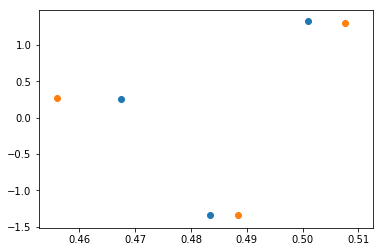

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


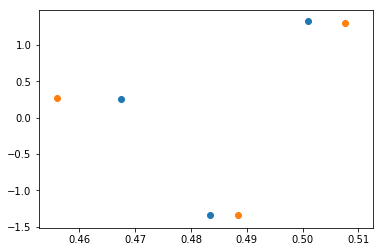

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


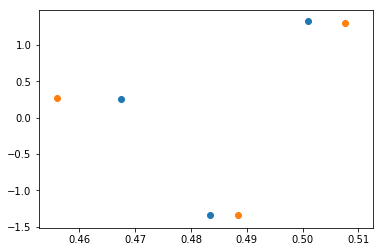

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


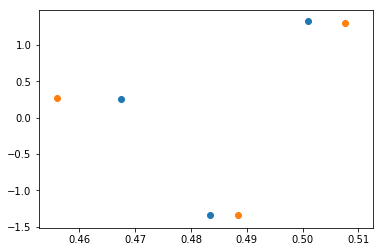

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


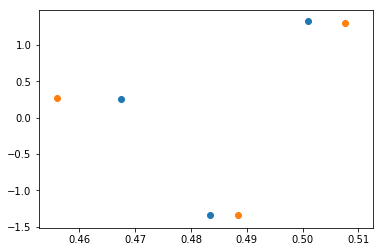

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


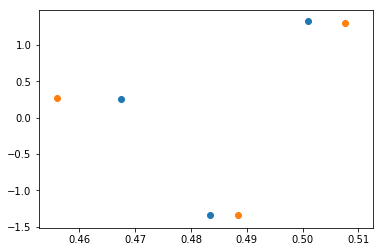

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


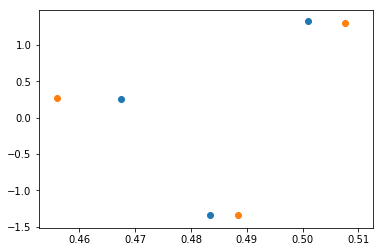

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


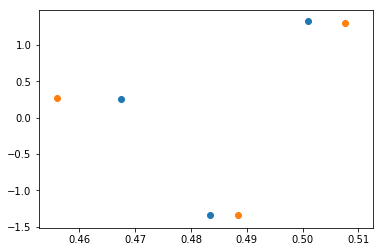

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


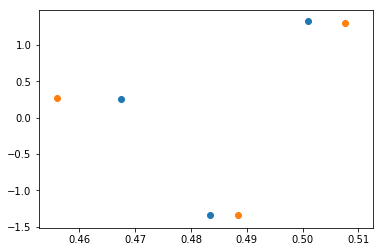

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


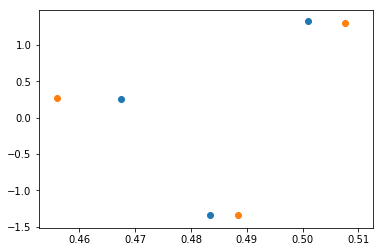

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


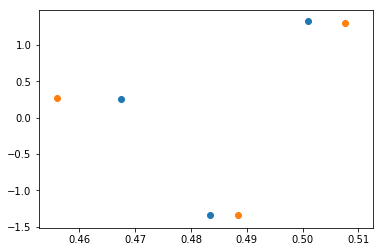

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


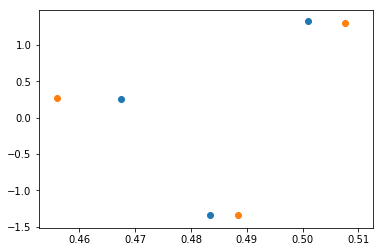

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


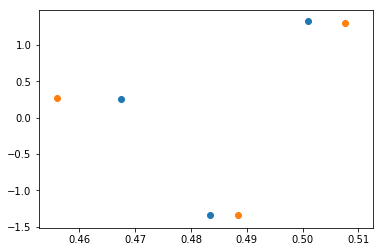

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


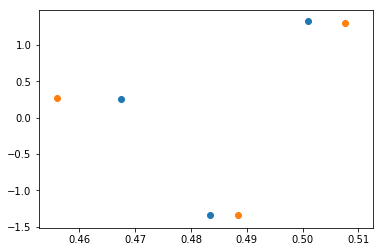

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


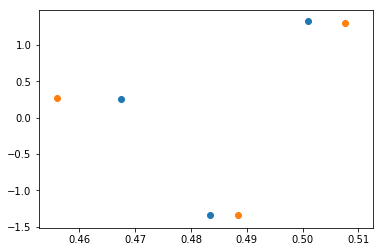

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


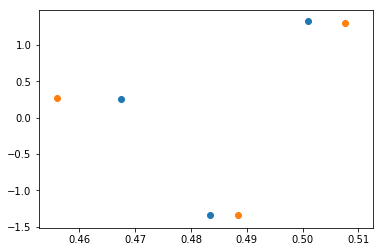

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


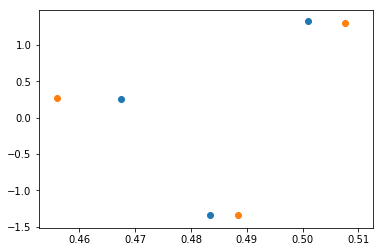

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


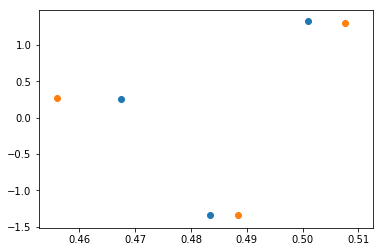

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


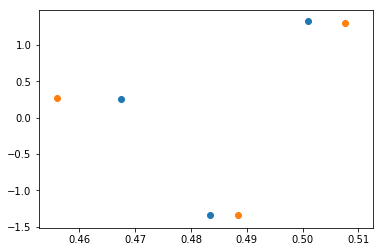

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


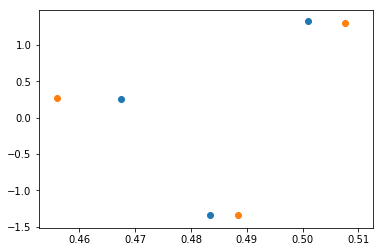

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


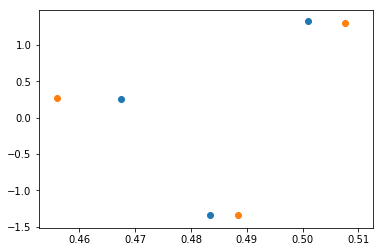

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


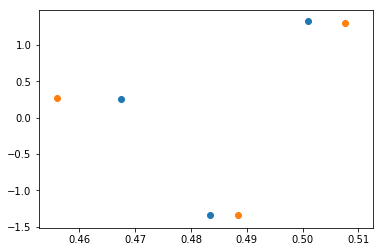

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


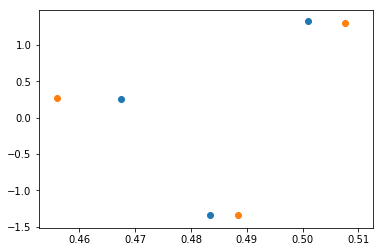

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


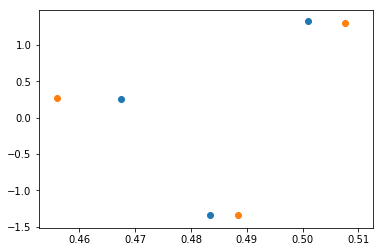

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


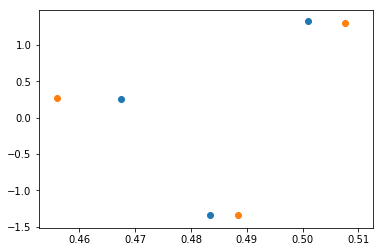

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


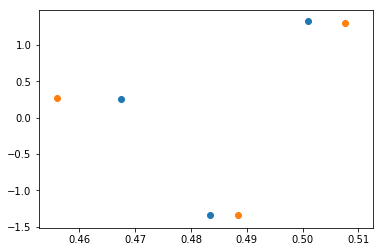

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


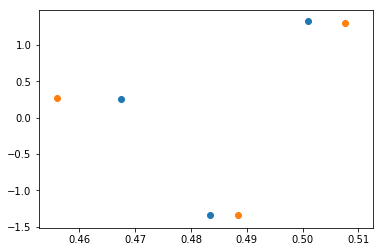

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


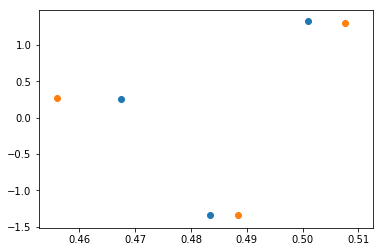

transform:
[[  1.00000000e+00  -2.09901541e-16   0.00000000e+00]
 [  3.20923843e-16   1.00000000e+00  -1.52655666e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


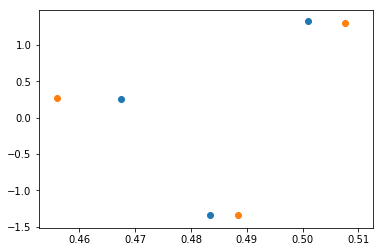

transform:
[[  1.00000000e+00   2.05564732e-16   0.00000000e+00]
 [  1.64798730e-17   1.00000000e+00  -1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
l2:0.038191


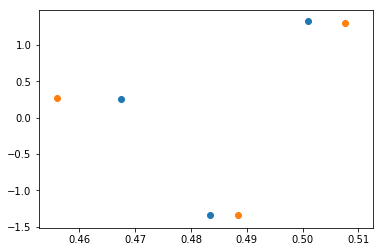

total tf:
[[  1.00000000e+00  -6.93889390e-18  -6.85366245e-31]
 [  1.65492620e-14   1.00000000e+00  -8.17401702e-15]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


In [109]:
total_tf = np.identity(tag_poses.shape[0])
for iteration in range(99
                      ):
    transform = best_fit_transform(gate_poses,tag_poses)
    print'transform:'
    print transform
    total_tf = np.dot(transform,total_tf)
    
    for i in range(tag_poses.shape[0]):
        tag_poses[i] = transform[0:2, 2] + np.matmul(transform[0:2, 0:2], tag_poses[i])
        
    print'l2:%f'%np.linalg.norm(gate_poses-tag_poses)
    plt.scatter(gate_poses[:,0],gate_poses[:,1])
    plt.scatter(tag_poses[:,0],tag_poses[:,1])
    plt.show()

print 'total tf:'
print total_tf